## Домашнее задание 11

Сначала проведем тримминг, так как очень низкое качество у последовательностей.

trimmomatic PE /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R1_001.fastq /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R2_001.fastq trimmed_R1_paired.fastq trimmed_R1_unpaired.fastq trimmed_R2_paired.fastq trimmed_R2_unpaired.fastq SLIDINGWINDOW:4:15 LEADING:3 TRAILING:3 MINLEN:36 

Посмотрим на отчеты fastqc до и после

До
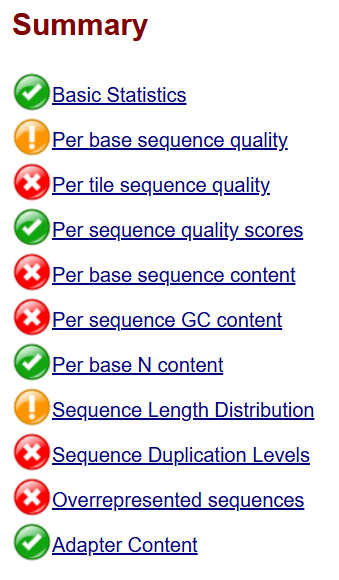

После
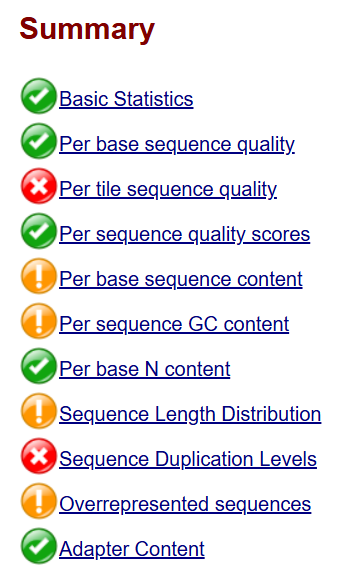

Будем использовать SPAdes, так как он подходит для вирусных геномов. Вот команда

python3 /projects/mipt_dbmp_biotechnology/soft/SPAdes-4.1.0-Linux/bin/spades.py -k 85 --careful -1 trimmed_R1_paired.fastq -2 trimmed_R2_paired.fastq -o ./spades_output 

Я попробовала миллион комбинаций параметров. Если брать слишком большой параметр k, например 99 или 127, получаем мало скафолдов - это хорошо, но теряем длину общую - около 5 тысяч остается. Если маленькие - то много скафолдов, около 50, но нормальная длина порядка 13 тысяч. Поэтому возьмем промежуточное значение 85.

Посмотрим отчет quast

quast.py -o quast_result -m 0 --threads 1 spades_output/scaffolds.fasta

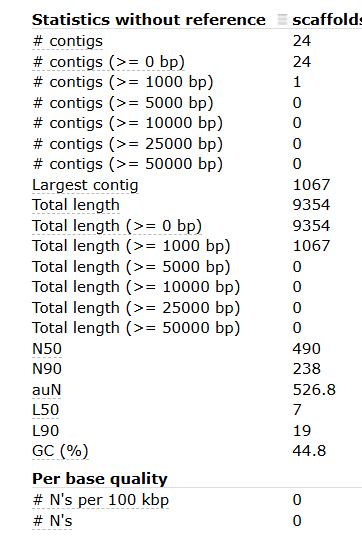
